# Telecom Churn Case Study Hackathon

Predict churning customers for a Telecom company based on temporal behaviour

**Author:** Venkata Kiran Kudupudi, Anirban Ganguly, Tirumalesh Yeligar

## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

## Loading the required python libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Load the data and do initial exploration

In [38]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_dd = pd.read_csv('data_dictionary.csv')
df_sample = pd.read_csv('sample.csv')

In [4]:
df_train.shape

(69999, 172)

In [5]:
df_test.shape

(30000, 171)

In [6]:
df_sample.shape

(30000, 2)

In [7]:
df_dd.shape

(36, 2)

In [8]:
df_dd

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


## Data Cleanup

**Check percentage of missing data**

In [39]:
train_missing = (round(((df_train.isnull().sum()/len(df_train.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
train_missing

,null
arpu_3g_6,74.9
count_rech_2g_6,74.9
night_pck_user_6,74.9
arpu_2g_6,74.9
date_of_last_rech_data_6,74.9
...,...
last_day_rch_amt_8,0.0
vol_2g_mb_6,0.0
vol_2g_mb_7,0.0
vol_2g_mb_8,0.0


**Check columns with more than 30% missing values**

In [40]:
col_list_30perc_missing = list(train_missing.index[train_missing['null'] > 30])
col_list_30perc_missing

['arpu_3g_6',
 'count_rech_2g_6',
 'night_pck_user_6',
 'arpu_2g_6',
 'date_of_last_rech_data_6',
 'total_rech_data_6',
 'av_rech_amt_data_6',
 'max_rech_data_6',
 'count_rech_3g_6',
 'fb_user_6',
 'night_pck_user_7',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'fb_user_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'av_rech_amt_data_7',
 'arpu_2g_7',
 'count_rech_2g_8',
 'av_rech_amt_data_8',
 'night_pck_user_8',
 'max_rech_data_8',
 'total_rech_data_8',
 'arpu_2g_8',
 'arpu_3g_8',
 'date_of_last_rech_data_8',
 'fb_user_8',
 'count_rech_3g_8']

**Drop the columns having more than 30% missing values**

In [41]:
traindata_curated = df_train.drop(col_list_30perc_missing, axis=1)
traindata_curated.shape

(69999, 142)

**Drop any columns related to dates**

In [42]:
date_cols = [k for k in traindata_curated.columns.to_list() if 'date' in k]
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8']

In [43]:
traindata_curated = traindata_curated.drop(date_cols, axis=1)
traindata_curated.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,...,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,...,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,...,0,0,0,0,0,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,156.362,205.260,111.095,7.26,16.01,...,0,0,0,0,0,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,240.708,128.191,101.565,21.28,4.83,...,0,0,0,1,0,647,0.0,0.0,0.0,0


**Drop circle id and id as it is unique ids**

In [44]:
traindata_curated = traindata_curated.drop(['circle_id','id'], axis=1)

**count the rows having more than 50% missing values**

In [45]:
df_missing_rows_50 = traindata_curated[(traindata_curated.isnull().sum(axis=1)) > (len(traindata_curated.columns)//2)]
df_missing_rows_50.shape

(758, 134)

**Let's now drop those rows with missing values**

In [46]:
traindata_curated = traindata_curated.drop(df_missing_rows_50.index)
traindata_curated.shape

(69241, 134)

In [47]:
traindata_curated.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Index: 69241 entries, 0 to 69998
Data columns (total 134 columns):
 #    Column              Dtype  
---   ------              -----  
 0    loc_og_t2o_mou      float64
 1    std_og_t2o_mou      float64
 2    loc_ic_t2o_mou      float64
 3    arpu_6              float64
 4    arpu_7              float64
 5    arpu_8              float64
 6    onnet_mou_6         float64
 7    onnet_mou_7         float64
 8    onnet_mou_8         float64
 9    offnet_mou_6        float64
 10   offnet_mou_7        float64
 11   offnet_mou_8        float64
 12   roam_ic_mou_6       float64
 13   roam_ic_mou_7       float64
 14   roam_ic_mou_8       float64
 15   roam_og_mou_6       float64
 16   roam_og_mou_7       float64
 17   roam_og_mou_8       float64
 18   loc_og_t2t_mou_6    float64
 19   loc_og_t2t_mou_7    float64
 20   loc_og_t2t_mou_8    float64
 21   loc_og_t2m_mou_6    float64
 22   loc_og_t2m_mou_7    float64
 23   loc_og_t2m_mou_8    float64
 24   loc_o

**Let's get a description of all columns**

In [21]:
traindata_curated.describe(include="all")

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69241.000000,69241.0,69241.0,69241.0,69241.000000,69241.000000,69241.000000,67231.000000,67312.000000,66296.000000,...,69241.000000,69241.000000,69241.000000,69241.000000,69241.000000,69241.000000,69241.000000,69241.000000,69241.000000,69241.000000
mean,34994.619720,0.0,0.0,0.0,284.152508,279.943967,280.734946,133.153275,133.894438,132.978257,...,0.075086,0.079794,0.075230,0.081642,0.085455,1224.791323,68.212793,65.953605,59.983469,0.095218
std,20202.212964,0.0,0.0,0.0,334.890697,345.233379,352.814151,299.963093,311.277193,311.896596,...,0.378941,0.378856,0.573449,0.634365,0.679690,953.511323,267.936493,267.702061,257.174886,0.293518
min,0.000000,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,17506.000000,0.0,0.0,0.0,94.256000,87.927000,85.726000,7.410000,6.675000,6.410000,...,0.000000,0.000000,0.000000,0.000000,0.000000,470.000000,0.000000,0.000000,0.000000,0.000000
50%,34994.000000,0.0,0.0,0.0,198.070000,193.194000,193.781000,34.110000,32.280000,32.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,874.000000,0.000000,0.000000,0.000000,0.000000
75%,52481.000000,0.0,0.0,0.0,371.572000,367.182000,371.862000,119.390000,115.837500,115.060000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1824.000000,0.000000,0.000000,0.000000,0.000000
max,69998.000000,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,...,16.000000,16.000000,29.000000,33.000000,41.000000,4337.000000,12916.220000,9165.600000,11166.210000,1.000000


# Create X, y and then Train test split

In [48]:
X = traindata_curated.iloc[:,:-1]
y = traindata_curated.iloc[:,-1]

X.shape, y.shape

((69241, 133), (69241,))

**Splitting train and test data to avoid any contamination of the test data**

In [24]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55392, 133), (13849, 133), (55392,), (13849,))

# Handle missing Data

In [50]:
missing_data_percent = 100*X_train.isnull().sum()/len(y_train)
missing_data_percent.sort_values(ascending=False)

loc_og_mou_8        4.285817
std_ic_t2f_mou_8    4.285817
loc_ic_t2f_mou_8    4.285817
loc_og_t2f_mou_8    4.285817
std_og_t2t_mou_8    4.285817
                      ...   
total_rech_amt_8    0.000000
max_rech_amt_6      0.000000
max_rech_amt_7      0.000000
max_rech_amt_8      0.000000
jun_vbc_3g          0.000000
Length: 133, dtype: float64

We would drop any columns which has more than 40% missing values

In [51]:
new_vars = missing_data_percent[missing_data_percent.le(40)].index
new_vars

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g'],
      dtype='object', length=133)

In [52]:
X_train_filtered = X_train[new_vars]
X_train_filtered.shape

(55392, 133)

At present we would replace all blank fields with 0

In [53]:
missing_data_percent = X_train_filtered.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7'

In [34]:
from sklearn.impute import SimpleImputer

In [54]:
imp = SimpleImputer(strategy='constant', fill_value=0)
X_train_filtered[impute_cols] = imp.fit_transform(X_train_filtered[impute_cols])

In [55]:
X_train_filtered.isnull().sum().sort_values(ascending=False)

loc_og_t2o_mou      0
std_ic_mou_6        0
ic_others_8         0
ic_others_7         0
ic_others_6         0
                   ..
std_og_t2f_mou_6    0
std_og_t2m_mou_8    0
std_og_t2m_mou_7    0
std_og_t2m_mou_6    0
jun_vbc_3g          0
Length: 133, dtype: int64

So at present we do not have any columns with empty values

In [56]:
X_train_filtered.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,55392.0,55392.0,55392.0,55392.000000,55392.000000,55392.000000,55392.000000,55392.000000,55392.000000,55392.000000,...,55392.000000,55392.000000,55392.000000,55392.000000,55392.000000,55392.000000,55392.00000,55392.000000,55392.000000,55392.000000
mean,0.0,0.0,0.0,283.666869,279.222512,280.000136,128.408822,129.475351,126.589535,192.027462,...,0.073206,0.075264,0.079669,0.075715,0.080445,0.082972,1223.48164,67.882967,65.684762,60.229437
std,0.0,0.0,0.0,341.719599,352.850602,359.040235,295.083635,308.501977,305.733814,311.485350,...,0.355699,0.383329,0.379833,0.559965,0.612047,0.633572,953.24770,261.507534,265.361753,258.964690
min,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.00000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,94.138000,87.214000,85.186750,5.997500,5.360000,4.560000,30.360000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,469.00000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,197.528500,192.454500,193.544000,31.520000,29.960000,28.490000,91.185000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,874.00000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,370.699250,365.417000,370.830500,114.265000,109.945000,107.730000,225.960000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1818.00000,0.000000,0.000000,0.000000
max,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8011.910000,9977.410000,8362.360000,...,9.000000,16.000000,16.000000,29.000000,33.000000,41.000000,4337.00000,7570.830000,8716.150000,11166.210000


## Exploratory Data Analysis & Preprocessing

Lets start by analysing the univariate distributions of each feature.

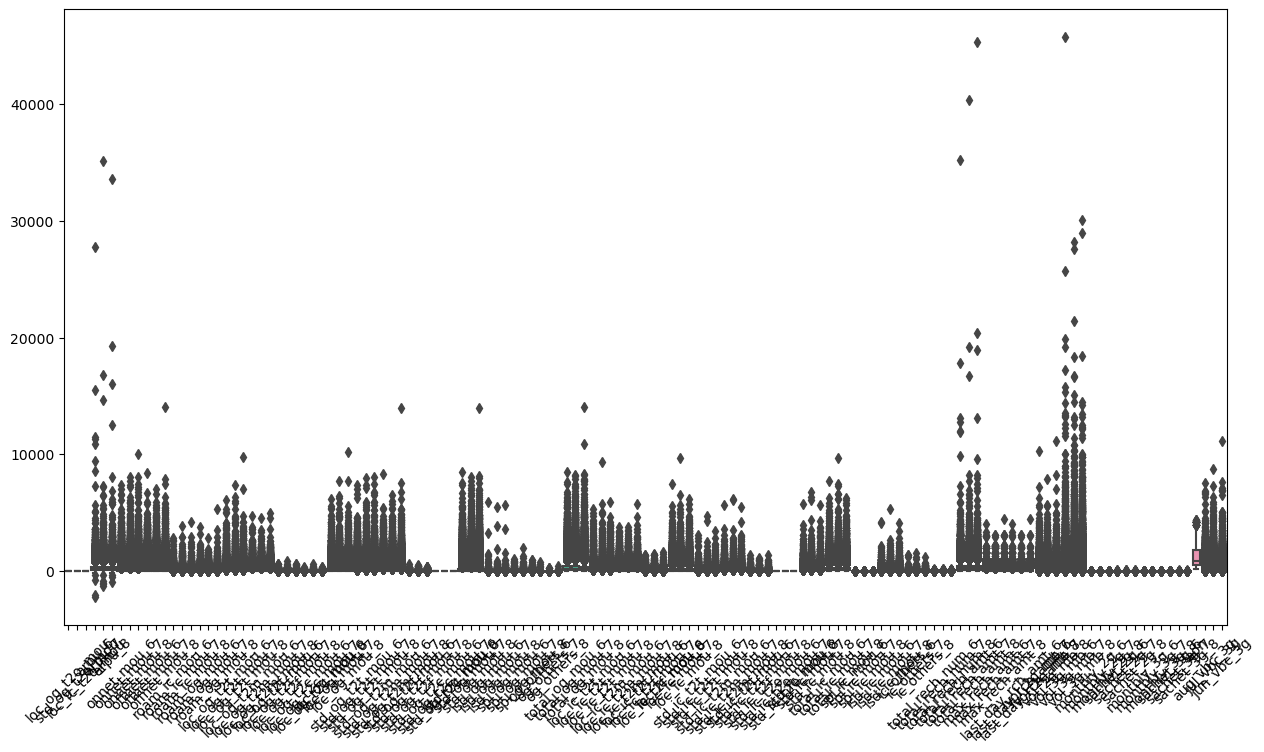

In [57]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train_filtered)
plt.show()